In [302]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames,engine="python", encoding="iso-8859-1")

In [4]:
display(users.head(2))
display(ratings.head(2))
display(movies.head(2))

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


# Question 1: 
An aggregate of movie ratings by men of age above 25 for each particular genre, e.g., Action, Adventure, Drama, Science Fiction, ... Note, Action|Drama|Thriller’ is not considered a unique genre. The movie that has a genre like this belongs to all three genres.

* step 1: check how many unique genre we have

In [5]:
movies["genres"].value_counts()

Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1
Name: genres, Length: 301, dtype: int64

* step 2: what is the longest genre group?

In [7]:
movies["genres"].str.count("\|").max()

5

* step3, we need to create 6 more columns to hold those genres

In [8]:
def assignCol(data, index):
    if index >= len(data): 
        return np.nan
    else: return data[index]

In [9]:
# declare a new dataframe to backup, called df_movie
df_movie = movies.copy()

In [16]:
df_movie["genres_A"] = df_movie["genres"].str.split("|").apply(lambda x: assignCol(x, 0))
df_movie["genres_B"] = df_movie["genres"].str.split("|").apply(lambda x: assignCol(x, 1))
df_movie["genres_C"] = df_movie["genres"].str.split("|").apply(lambda x: assignCol(x, 2))
df_movie["genres_D"] = df_movie["genres"].str.split("|").apply(lambda x: assignCol(x, 3))
df_movie["genres_E"] = df_movie["genres"].str.split("|").apply(lambda x: assignCol(x, 4))
df_movie["genres_F"] = df_movie["genres"].str.split("|").apply(lambda x: assignCol(x, 5))

In [22]:
# df_moive sample looks like beneath
df_movie.loc[[4,2,0,47,69,1187]]

,movie_id,title,genres,genres_A,genres_B,genres_C,genres_D,genres_E,genres_F
4,5,Father of the Bride Part II (1995),Comedy,Comedy,NaN,NaN,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,NaN,NaN,NaN,NaN
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation,Children's,Comedy,NaN,NaN,NaN
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance,Animation,Children's,Musical,Romance,NaN,NaN
69,70,From Dusk Till Dawn (1996),Action|Comedy|Crime|Horror|Thriller,Action,Comedy,Crime,Horror,Thriller,NaN
1187,1205,"Transformers: The Movie, The (1986)",Action|Animation|Children's|Sci-Fi|Thriller|War,Action,Animation,Children's,Sci-Fi,Thriller,War


* step 4, melt genresA - genresF in to one column and dropna

In [27]:
movie_melt = df_movie.drop(columns = "genres")\
                     .melt(var_name = "original columns", value_name = "genres", 
                           value_vars=["genres_A", "genres_B","genres_C","genres_D","genres_E", "genres_F"],
                           id_vars = ["movie_id", "title"])\
                     .drop(columns = "original columns")\
                     .dropna()
movie_melt

,movie_id,title,genres
0,1,Toy Story (1995),Animation
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
17517,2054,"Honey, I Shrunk the Kids (1989)",Sci-Fi
17543,2080,Lady and the Tramp (1955),Romance
17544,2081,"Little Mermaid, The (1989)",Romance
17785,2322,Soldier (1998),War


* step 5 confirm that the movie_melt dataframe has the same length as required

In [48]:
def confirm_df_length():
    length_list = []
    # 6 genres in the movie
    genres6 = movies[movies["genres"].str.count("\|") == 5].shape[0]
    # 5 genres in the movie
    genres5 = movies[movies["genres"].str.count("\|") == 4].shape[0]
    # 6 genres in the movie
    genres4 = movies[movies["genres"].str.count("\|") == 3].shape[0]
    # 6 genres in the movie
    genres3 = movies[movies["genres"].str.count("\|") == 2].shape[0]
    # 6 genres in the movie
    genres2 = movies[movies["genres"].str.count("\|") == 1].shape[0]
    # 6 genres in the movie
    genres1 = movies[movies["genres"].str.count("\|") == 0].shape[0]
    
    length_list.append(6 * genres6)
    length_list.append(5 * genres5)
    length_list.append(4 * genres4)
    length_list.append(3 * genres3)
    length_list.append(2 * genres2)
    length_list.append(1 * genres1)
    
    for i in range(6,0,-1):
        print(f"we have {length_list[6-i]//i} movies with {i}'s genres")
    print("total number of genres is", sum(length_list))
    return sum(length_list)

In [49]:
assert confirm_df_length() == movie_melt.shape[0]

we have 1 movies with 6's genres
we have 14 movies with 5's genres
we have 100 movies with 4's genres
we have 421 movies with 3's genres
we have 1322 movies with 2's genres
we have 2025 movies with 1's genres
total number of genres is 6408


* step6 create a df holds the value of men whoes age is above 25

In [51]:
df_men_over25 = users.copy()
df_men_over25 = df_men_over25[(df_men_over25["gender"] == "M") & (df_men_over25["age"] > 25)]
display(df_men_over25.shape)
df_men_over25.sample(5)

(1844, 5)

,user_id,gender,age,occupation,zip
4825,4826,M,45,12,55436
55,56,M,35,20,60440
3997,3998,M,45,0,74354
5195,5196,M,56,7,20814
2331,2332,M,56,14,01545


In [58]:
men_25_merge_3_df = movie_melt.merge(ratings, left_on = "movie_id", right_on = "movie_id")\
                              .merge(df_men_over25, left_on = "user_id", right_on = "user_id")
men_25_merge_3_df

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Animation,23,4,978463614,M,35,0,90049
1,1,Toy Story (1995),Children's,23,4,978463614,M,35,0,90049
2,1,Toy Story (1995),Comedy,23,4,978463614,M,35,0,90049
3,2,Jumanji (1995),Adventure,23,2,978461604,M,35,0,90049
4,2,Jumanji (1995),Children's,23,2,978461604,M,35,0,90049
...,...,...,...,...,...,...,...,...,...,...
612990,3176,"Talented Mr. Ripley, The (1999)",Drama,5145,4,962028914,M,35,7,77565-2332
612991,3176,"Talented Mr. Ripley, The (1999)",Mystery,5145,4,962028914,M,35,7,77565-2332
612992,3176,"Talented Mr. Ripley, The (1999)",Thriller,5145,4,962028914,M,35,7,77565-2332
612993,3742,"Battleship Potemkin, The (Bronenosets Potyomki...",Drama,5145,5,962028814,M,35,7,77565-2332


In [63]:
men_25_merge_3_df[men_25_merge_3_df["user_id"] == 23]

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Animation,23,4,978463614,M,35,0,90049
1,1,Toy Story (1995),Children's,23,4,978463614,M,35,0,90049
2,1,Toy Story (1995),Comedy,23,4,978463614,M,35,0,90049
3,2,Jumanji (1995),Adventure,23,2,978461604,M,35,0,90049
4,2,Jumanji (1995),Children's,23,2,978461604,M,35,0,90049
...,...,...,...,...,...,...,...,...,...,...
742,3877,Supergirl (1984),Fantasy,23,1,978461689,M,35,0,90049
743,3920,"Faraway, So Close (In Weiter Ferne, So Nah!) (...",Drama,23,2,978461308,M,35,0,90049
744,3920,"Faraway, So Close (In Weiter Ferne, So Nah!) (...",Fantasy,23,2,978461308,M,35,0,90049
745,3952,"Contender, The (2000)",Drama,23,4,978461000,M,35,0,90049


In [67]:
men_25_merge_3_df.groupby("genres")\
                 .describe()["rating"]\
                 .sort_values("count", ascending = False)

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Drama,107794.0,3.812309,1.000675,1.0,3.0,4.0,5.0,5.0
Comedy,95836.0,3.565456,1.082492,1.0,3.0,4.0,4.0,5.0
Action,76448.0,3.554547,1.080126,1.0,3.0,4.0,4.0,5.0
Thriller,54883.0,3.644025,1.051257,1.0,3.0,4.0,4.0,5.0
Sci-Fi,49518.0,3.509693,1.115381,1.0,3.0,4.0,4.0,5.0
Adventure,39923.0,3.538637,1.078655,1.0,3.0,4.0,4.0,5.0
Romance,39747.0,3.659748,1.027161,1.0,3.0,4.0,4.0,5.0
War,24391.0,3.940634,1.008249,1.0,3.0,4.0,5.0,5.0
Crime,22545.0,3.764249,1.016280,1.0,3.0,4.0,5.0,5.0


# Question II
The top 5 ranked movies by the most number of ratings (not the highest rating).

In [91]:
merge_all_three_tables = movies.merge(ratings, on = "movie_id")\
                               .merge(users, on="user_id")
merge_all_three_tables

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [92]:
merge_all_three_tables.groupby("title")\
                      .count()[["rating"]]\
                      .sort_values("rating", ascending= False)\
                      .head()

,rating
title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672


# Question III
Average movie ratings between users of different age groups (<18, 18-30, 30-50,
50-70, 70>)

In [118]:
merge_all_three_tables["age_group"] = pd.cut(merge_all_three_tables["age"], [0,17,29,49,69, 100], 
                                             labels = ["less than 18", "18 - 29", "30 - 49", "50 - 69", "greater than 69"])

In [119]:
merge_all_three_tables

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip,age_group
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,less than 18
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,less than 18
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,less than 18
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,less than 18
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,less than 18
...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,18 - 29
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,18 - 29
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,18 - 29
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,18 - 29


In [127]:
merge_all_three_tables.groupby("age_group")\
                      .mean()[["rating"]]\
                      .rename(columns = {"rating": "Average Movie Ratings"})\
                      .fillna("Data not covered")

,Average Movie Ratings
age_group,
less than 18,3.54952
18 - 29,3.533299
30 - 49,3.62405
50 - 69,3.732677
greater than 69,Data not covered


# Question IV
Pick a movie of your choice and for all movies of the same year, provide a breakdown of the number of unique movies rated by 3 ranges of age of reviewers (a) under 18 (b) 19 to 45 (c) Above 45.

* pick movie name `Apollo 13` which was shown on year 2000

In [147]:
merge_all_three_tables["date"] = pd.to_datetime(merge_all_three_tables["timestamp"], unit="s")

In [170]:
apollo13 = merge_all_three_tables[merge_all_three_tables["title"] == "Apollo 13 (1995)"]
apollo13.head(2)

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip,age_group,date
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,less than 18,2000-12-31 22:29:37
139,150,Apollo 13 (1995),Drama,8,4,978230611,M,25,12,11413,18 - 29,2000-12-31 02:43:31


In [178]:
merge_all_three_tables_2000 = merge_all_three_tables[merge_all_three_tables["date"].dt.year == 2000].copy()

In [180]:
merge_all_three_tables_2000["age_group"] = pd.cut(merge_all_three_tables_2000["age"],
                                                  [0,18,45,100],
                                                  labels=["a) under 18", "b) 19 - 45", "c) above 45"])
merge_all_three_tables_2000["year"] = merge_all_three_tables_2000["date"].dt.year

In [181]:
merge_all_three_tables_2000.sample(5)

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip,age_group,date,year
432510,2099,Song of the South (1946),Adventure|Animation|Children's|Musical,4438,3,965098514,M,50,0,11947,c) above 45,2000-08-01 02:55:14,2000
390010,3699,Starman (1984),Adventure|Drama|Romance|Sci-Fi,4016,3,965529227,M,50,0,33901,c) above 45,2000-08-06 02:33:47,2000
71640,750,Dr. Strangelove or: How I Learned to Stop Worr...,Sci-Fi|War,801,4,975469694,F,25,20,95776,b) 19 - 45,2000-11-29 03:48:14,2000
941108,1620,Kiss the Girls (1997),Crime|Drama|Thriller,5895,2,957462368,M,25,1,43026,b) 19 - 45,2000-05-04 17:46:08,2000
294936,2369,Desperately Seeking Susan (1985),Comedy|Romance,3196,1,968637962,F,18,4,45219,a) under 18,2000-09-11 02:06:02,2000


In [224]:
unique_film_2000_by_age = merge_all_three_tables_2000.groupby(["year", "age_group"])\
                                                     .apply(lambda x: x["title"].nunique())\
                                                     .to_frame()\
                                                     .rename(columns = {0: "No. unique movies rating by age group"})
                                                
unique_film_2000_by_age                           

No. unique movies rating by age group
year age_group                                         
2000 a) under 18                                   3379
     b) 19 - 45                                    3581
     c) above 45                                   3288

# Question V
A function that takes in a user_id and a movie_id, and returns a list of all the other movies that the user rated similarly to the given movie, i.e. with the same rating. Demonstrate that your function works.

In [276]:
merge_all_three_tables

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip,age_group,date
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,less than 18,2001-01-06 23:37:48
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,less than 18,2001-01-06 23:39:11
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,less than 18,2000-12-31 22:29:37
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,less than 18,2000-12-31 22:12:40
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,less than 18,2001-01-06 23:36:35
...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,18 - 29,2000-05-16 15:12:50
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,18 - 29,2000-05-16 15:12:50
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,18 - 29,2000-05-16 15:11:42
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,18 - 29,2000-05-16 15:24:59


In [278]:
def same_rating_like_given_movie(user_id:int, movie_id:int)->list:
    movie_group_for_user = merge_all_three_tables[merge_all_three_tables["user_id"] == user_id]
    rating = movie_group_for_user[movie_group_for_user["movie_id"] == movie_id]["rating"]
    if len(rating) == 0:
        return "Sorry there is no other movies match your search"
    else: rating = rating.values[0]
    
    result = movie_group_for_user[movie_group_for_user["rating"] == rating]
    
    return result["title"].tolist()


In [279]:
same_rating_like_given_movie(1, 1)

['Toy Story (1995)',
 'Pocahontas (1995)',
 'Apollo 13 (1995)',
 "Schindler's List (1993)",
 'Beauty and the Beast (1991)',
 'Cinderella (1950)',
 'Mary Poppins (1964)',
 'Dumbo (1941)',
 'Sound of Music, The (1965)',
 "One Flew Over the Cuckoo's Nest (1975)",
 'Back to the Future (1985)',
 'Ben-Hur (1959)',
 'Last Days of Disco, The (1998)',
 'Rain Man (1988)',
 'Saving Private Ryan (1998)',
 "Bug's Life, A (1998)",
 'Christmas Story, A (1983)',
 'Awakenings (1990)']

In [280]:
same_rating_like_given_movie(5727, 3578)

['Red Violin, The (Le Violon rouge) (1998)',
 'Arlington Road (1999)',
 'Thomas Crown Affair, The (1999)',
 'American Beauty (1999)',
 'Toy Story 2 (1999)',
 'Whole Nine Yards, The (2000)',
 'Erin Brockovich (2000)',
 'Keeping the Faith (2000)',
 'Gladiator (2000)']

In [281]:
same_rating_like_given_movie(99999, 99999)

'Sorry there is no other movies match your search'

# Q6 
Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

In [290]:
colors = ["#" + "".join([random.choice("0123456789ABCDEF") for j in range(6)]) for i in range(18)]

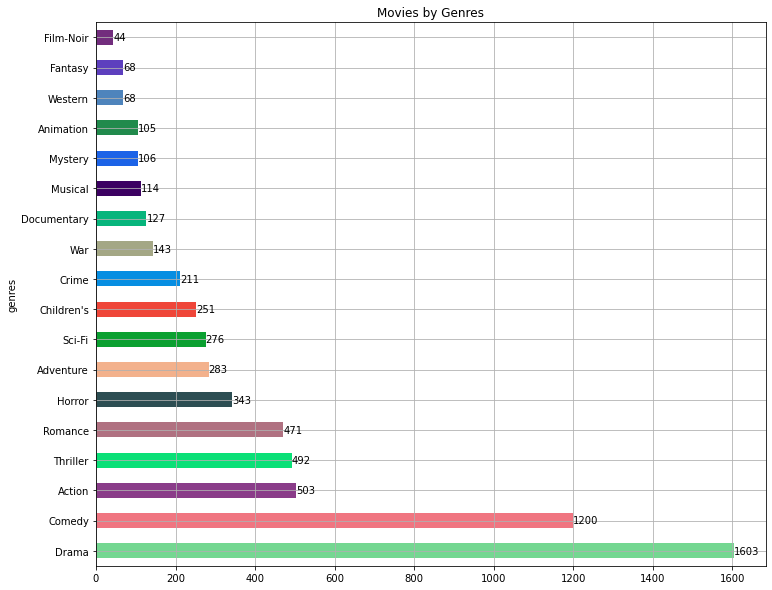

In [303]:
plot1 = movie_melt.value_counts("genres")\
                  .plot(kind = "barh", figsize=(12,10),color = colors, grid=True,
                       title = "Movies by Genres")
plot1.bar_label(plot1.containers[0])
plt.show()

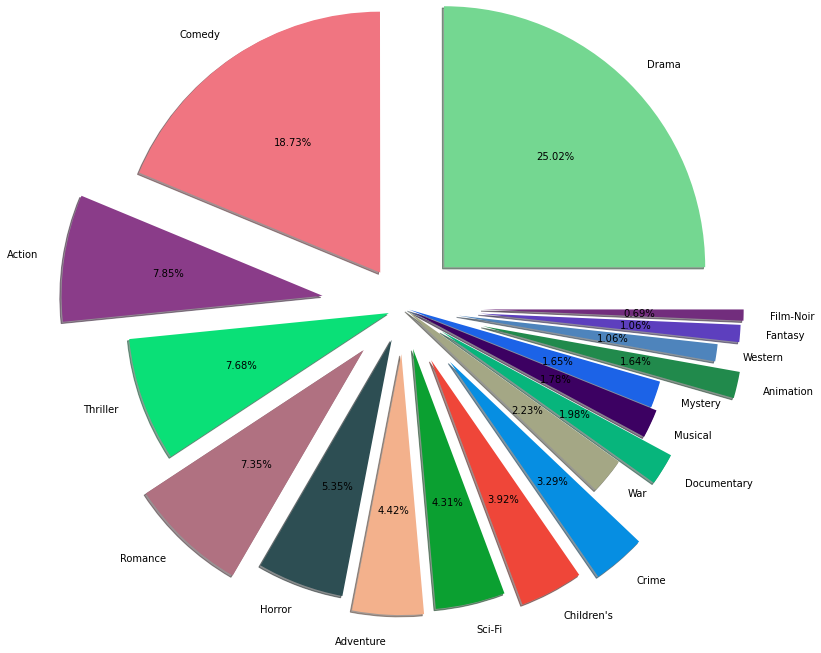

In [320]:
plot2 = movie_melt.value_counts("genres")\
                  .plot(kind = "pie", radius = 3, label = "",
                        explode = [random.random() for i in range(18)], shadow = True,
                        colors = colors, autopct = "%1.2f%%")

In [350]:
movie_melt.value_counts("genres")

genres
Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Western          68
Fantasy          68
Film-Noir        44
dtype: int64

In [352]:
movies.value_counts("genres")

genres
Drama                                   843
Comedy                                  521
Horror                                  178
Comedy|Drama                            162
Comedy|Romance                          142
                                       ... 
Animation|Children's|Drama|Fantasy        1
Animation|Children's|Fantasy|War          1
Animation|Children's|Musical|Romance      1
Animation|Mystery                         1
Animation|Children's|Fantasy|Musical      1
Length: 301, dtype: int64

In [353]:
men_25_merge_3_df.groupby("genres")\
                 .describe()["rating"]\
                 .sort_values("count", ascending = False)

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Drama,107794.0,3.812309,1.000675,1.0,3.0,4.0,5.0,5.0
Comedy,95836.0,3.565456,1.082492,1.0,3.0,4.0,4.0,5.0
Action,76448.0,3.554547,1.080126,1.0,3.0,4.0,4.0,5.0
Thriller,54883.0,3.644025,1.051257,1.0,3.0,4.0,4.0,5.0
Sci-Fi,49518.0,3.509693,1.115381,1.0,3.0,4.0,4.0,5.0
Adventure,39923.0,3.538637,1.078655,1.0,3.0,4.0,4.0,5.0
Romance,39747.0,3.659748,1.027161,1.0,3.0,4.0,4.0,5.0
War,24391.0,3.940634,1.008249,1.0,3.0,4.0,5.0,5.0
Crime,22545.0,3.764249,1.016280,1.0,3.0,4.0,5.0,5.0


In [354]:
merge_all_three_tables.groupby("title")\
                      .count()[["rating"]]\
                      .sort_values("rating", ascending= False)\
                      .head()

,rating
title,
American Beauty (1999),3428
Star Wars: Episode IV - A New Hope (1977),2991
Star Wars: Episode V - The Empire Strikes Back (1980),2990
Star Wars: Episode VI - Return of the Jedi (1983),2883
Jurassic Park (1993),2672


### Observations:
* The original movies has `301` different genres while most of them are composite genres like `Animation|Children's|Drama|Fantasy`, however when I used `melt` function or `pivot` function to transform one columns to multiple columns and stack them together, I found there are only 18 unique genres

* Genre prefered by group men age above 25 
    * Originally I thought men above 25 may like `war` or `Adventure` genres, but by analysing data through this dataset it shows men prefer `Drama` which is far away from my prediction. 
    * Meanwhile, I found men over 25 don't prefer `Animation and Fantasy` which is similar like I thougth, 
    * Last the least popular type is `Documentary`
* StarWars is the most famous topic because within the top 5 movies by rating, 3 of them are Star Wars
